<h1><center>Anomaly Detection with Isolation Forest</center></h1>
<h2><center>M. Esmali, PhD</center></h2>


## Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import5

## Import Data from CSV files



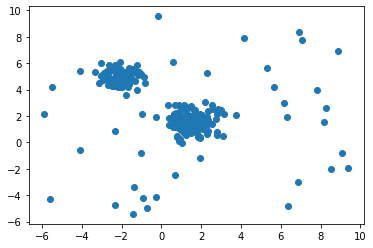

In [2]:
df = pd.read_csv('data_set_A.csv')

df.head()

x = df.values

plt.scatter(x[:,0], x[:,1])

## Model Training - [IsolationForest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html)



In [3]:
clf = IsolationForest(contamination=.1)
clf.fit(x)
predictions = clf.predict(x)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [4]:
(predictions<0).mean()

0.1

In [5]:
abn_ind = np.where(predictions < 0)

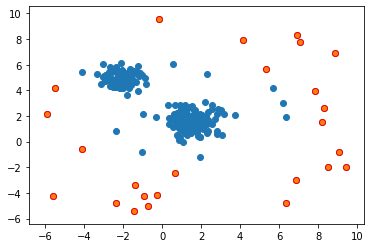

In [6]:
plt.scatter(x[:,0], x[:,1])
plt.scatter(x[abn_ind,0], x[abn_ind,1], edgecolors="r")

# time series data 


In [7]:
df_sen = pd.read_csv('sensors.csv', index_col='time')
df_sen.head()

,sensor1,sensor2,sensor3
time,,,
2020-04-01 00:00:00,0.248380,3.214768,12.313405
2020-04-01 00:01:00,2.258430,1.054156,11.453157
2020-04-01 00:02:00,4.834818,0.284641,10.082687
2020-04-01 00:03:00,5.058023,0.845871,9.870637
2020-04-01 00:04:00,6.888020,-2.019289,9.265985


In [8]:
df_sen.index = pd.to_datetime(df_sen.index)
type(df_sen.index)

pandas.core.indexes.datetimes.DatetimeIndex

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


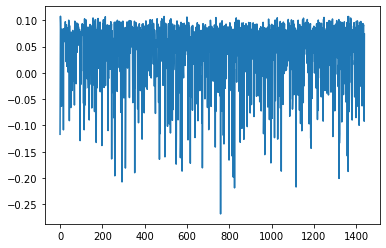

In [9]:
x = df_sen.values

clf = IsolationForest(contamination=.1)
predictions = clf.fit_predict(x)
dec_fun = clf.decision_function(x)

plt.plot(dec_fun)

In [10]:
df_sen['health'] = dec_fun
df_sen.head()

,sensor1,sensor2,sensor3,health
time,,,,
2020-04-01 00:00:00,0.248380,3.214768,12.313405,-0.116957
2020-04-01 00:01:00,2.258430,1.054156,11.453157,0.025641
2020-04-01 00:02:00,4.834818,0.284641,10.082687,0.107654
2020-04-01 00:03:00,5.058023,0.845871,9.870637,0.094334
2020-04-01 00:04:00,6.888020,-2.019289,9.265985,0.059129


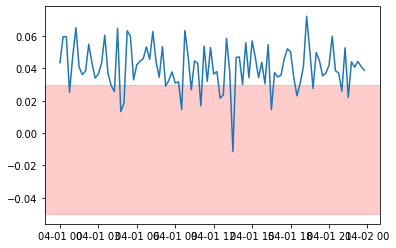

In [15]:
plt.plot(df_sen['health'].resample('15T').mean())
plt.axhspan(-.05, .03, alpha=0.2, color='red')